In [1]:
%matplotlib inline
import sys
import os
import numpy
import scipy
from matplotlib import pyplot
print os.getcwd()
sys.path.insert(0, '../')
from filter.filters import Filter, FilterFactory, truncate

/Users/maxiak/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


/Users/maxiak/Documents/speakers/notebooks
Computing crc for ../filter/filters.py


In [2]:
ff = FilterFactory(48000, 1024)

Please close figure window to continue


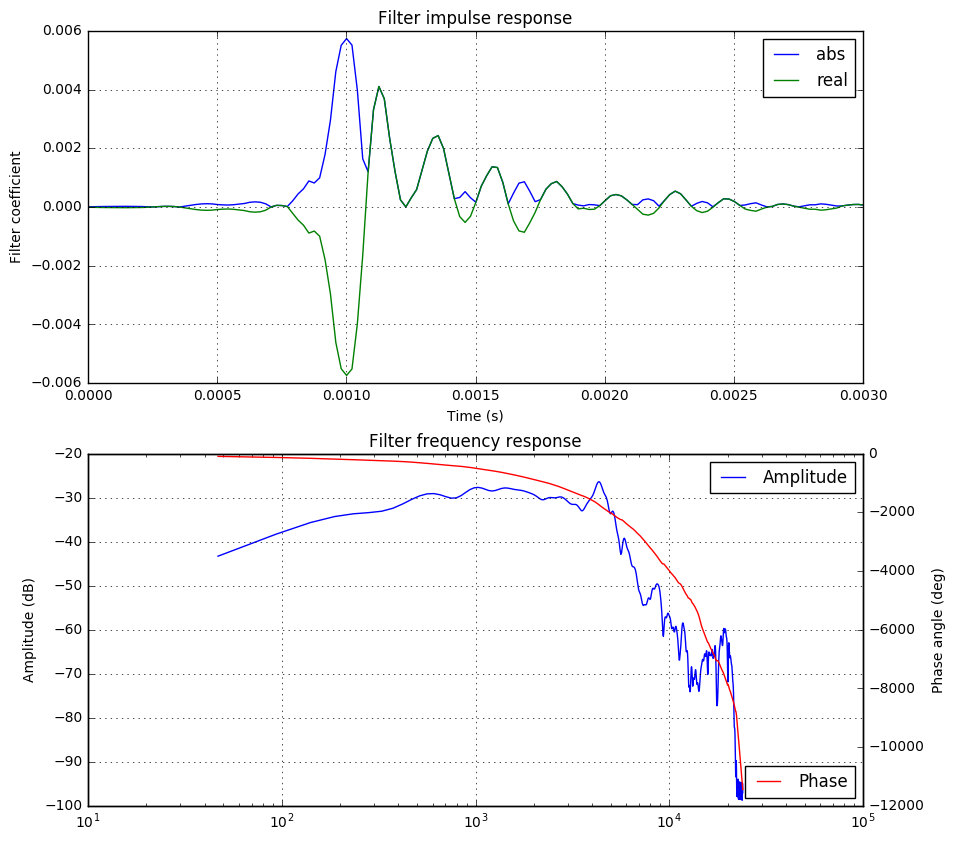

Please close figure window to continue


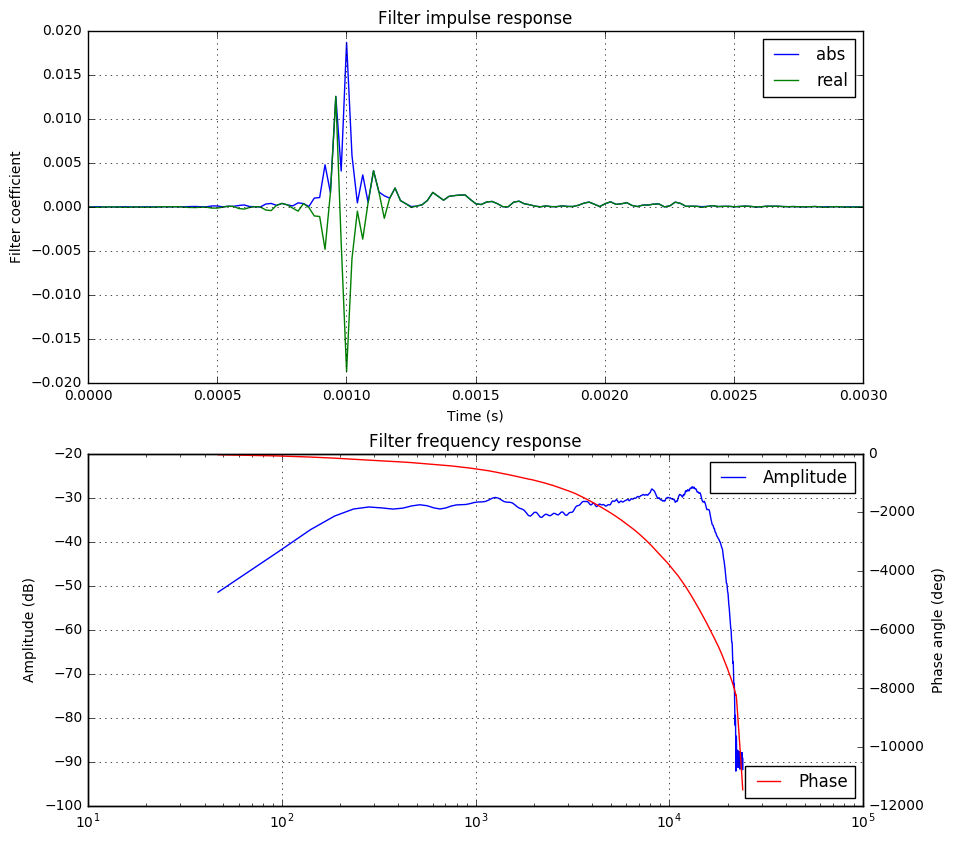

Please close figure window to continue


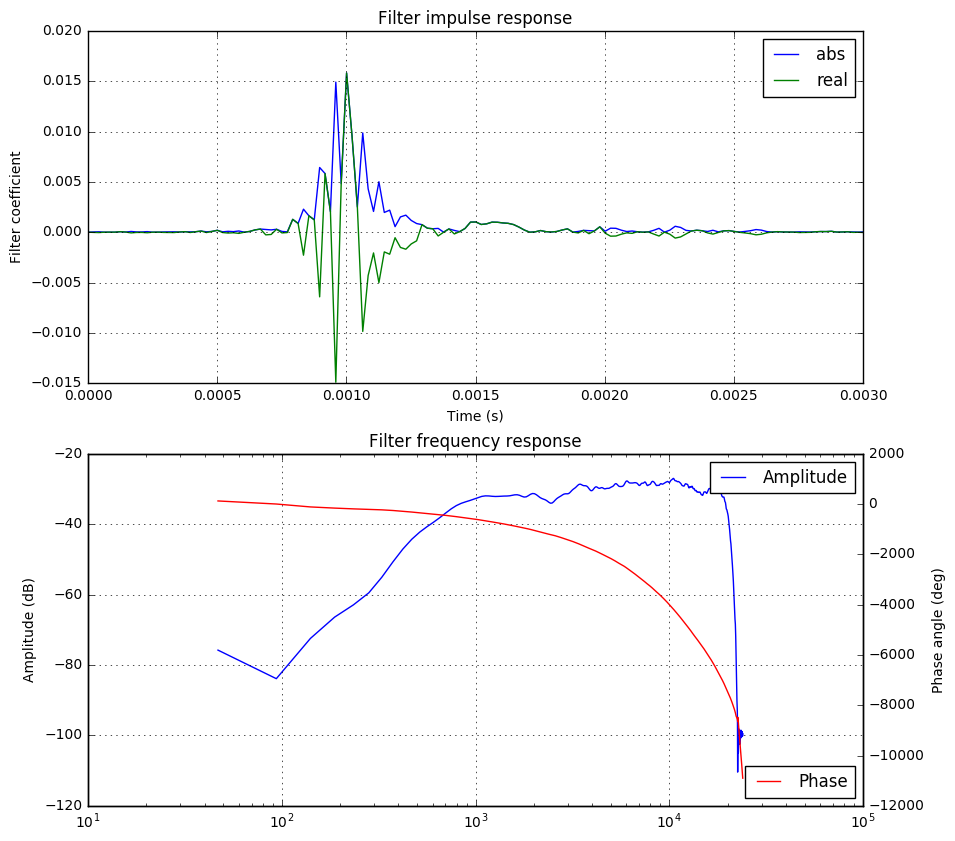

In [3]:
bass_driver = ff.measurement('../measurements/bassright.txt.gz', (-.001, 0.0031))
mid_driver = ff.measurement('../measurements/midright.txt.gz', (-.001, 0.0040))
tweeter_driver = ff.measurement('../measurements/tweeterright.txt.gz', (-.001, 0.0040))
bass_driver.plot()
mid_driver.plot()
tweeter_driver.plot()



In [4]:

def plot_system(filters, plot_sum=True):
    filter_sum = ff.nopass()
    pyplot.figure(figsize=(12, 6))
    pyplot.hold(True)
    for filt in filters:
        filter_sum += filt
    if plot_sum:
        filters_aug = filters + [filter_sum,]
    else:
        filters_aug = filters
    peak_val = -9999
    for filt in filters_aug:
        filter_size = len(filt.coefficients)
        fft_coefs = scipy.fftpack.fft(filt.coefficients)
        freq_scale = numpy.linspace(0, filt.sample_freq, filter_size + 1)[:-1]
        fft_coefs = fft_coefs[:(filter_size / 2 + 1)]
        freq_scale = freq_scale[:(filter_size) / 2 + 1]
        fr_mag = 20 * numpy.log10(numpy.abs(fft_coefs))
        pyplot.semilogx(freq_scale, fr_mag)
        peak_val = max(peak_val, numpy.max(fr_mag))
    pyplot.grid(True)
    pyplot.ylim(peak_val - 20, peak_val + 3)

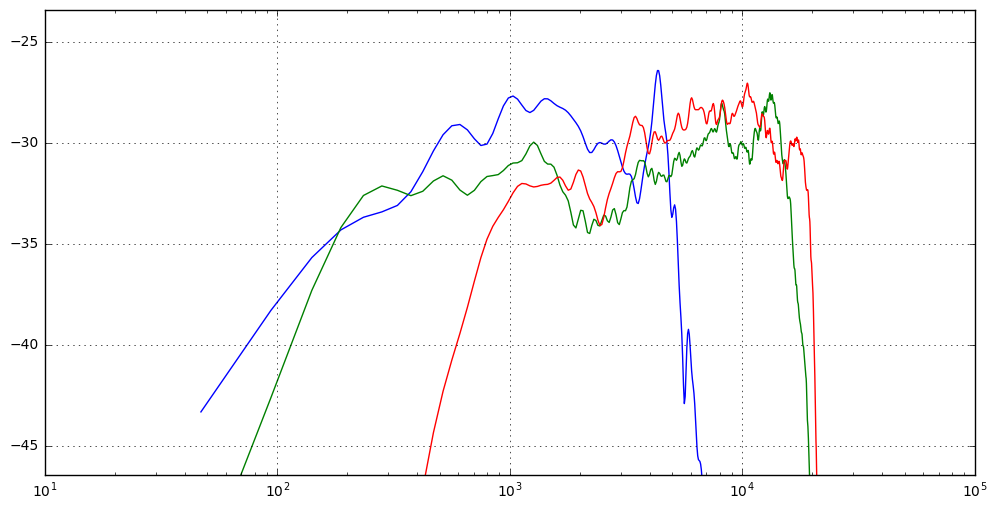

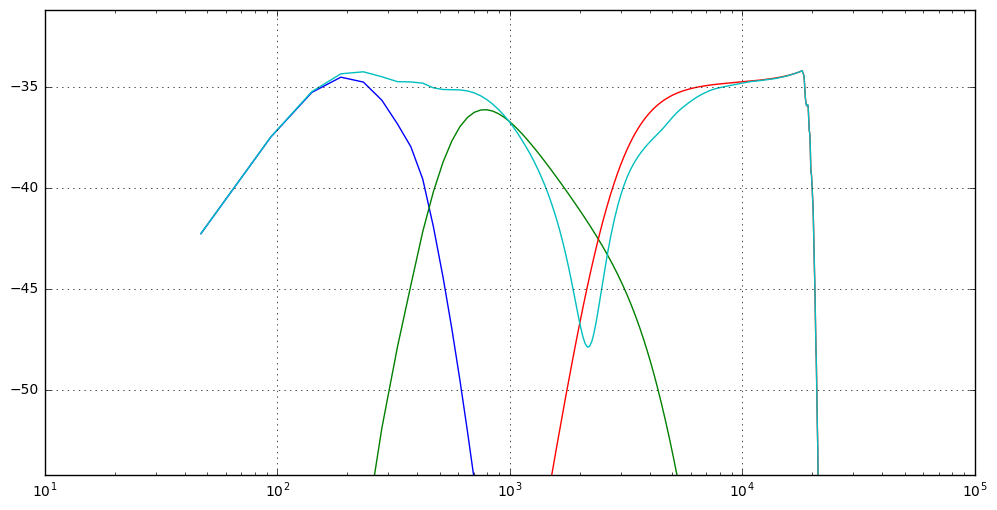

In [24]:
baffle_step = ff.shelf(350, -6)

tw_comp = ff.invert_measurement('../measurements/tweeterright.txt.gz', (-1e-3, 4e-3), (1.2e3, 1.8e4))
mid_comp = ff.invert_measurement('../measurements/midright.txt.gz', (-1e-3, 4e-3), (400, 1e4))
wf_comp = ff.invert_measurement('../measurements/bassright.txt.gz', (-1e-3, 3.1e-3), (400, 3e3))


RT2 = 0.707

mid_hp = ff.analog_hp2(550, RT2) ** 2
mid_lp = ff.analog_lp2(4500, RT2) ** 2
mid_bp = mid_hp * mid_lp

crossover = [
     wf_comp * (ff.analog_lp2(450, RT2) ** 2) * baffle_step,
     mid_comp * mid_bp * baffle_step * ff.gain(4),
     tw_comp * (ff.analog_hp2(2700, RT2) ** 2) * ff.gain(-4)
]

system = [
    crossover[0] * bass_driver,
    crossover[1] * mid_driver,
    crossover[2] * tweeter_driver
]

#crossover[1].plot()

meas_only = [bass_driver, mid_driver, tweeter_driver]
plot_system(meas_only, plot_sum=False)

plot_system(system)